# 1번 
# 전처리가 된 house_prices_processed.csv 데이터를이용하여 saleprice 를 예측하려고 한다. 다항식 회기, SVR,결정트리,랜덤포레스트 그래프를 싸이킷런 템플릿을 활용하여 구하고 해당 그래프들을 그리시오. 필요시 피쳐 스케일링을 활용하시오. 트레이닝 데이터 대비 테스트 데이터 비율을 (70 대 30)으로 정하시오

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [12]:
df1 = pd.read_csv('/Users/kenzie8/Documents/머신러닝입문/10주차과제/house_prices_processed.csv')
df1.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,2,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,3,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,4,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [13]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

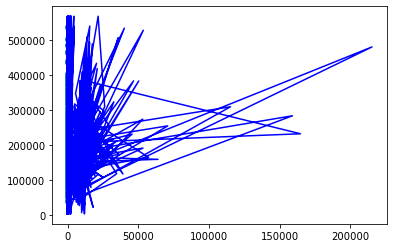

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df1.drop('SalePrice',axis=1).values
Y = df1['SalePrice']
# salePrice를 제외한 나머지 열을 x로, Saleprice열을 Y로 정의함. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.3, random_state=5)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
X_train=np.arange(0,len(X_train),1)
plt.plot(X, lr_reg.predict(X), color = 'blue')
plt.scatter(X_train, y_train)
plt.show()

In [27]:
# X와 y의 트레이닝 데이터와 테스트 데이터 분류하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=11)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 로지스틱 회귀 클래스 인스턴스 생성 ( 객체를 만들기 )
lr_clf = LogisticRegression()

# 로지스틱 모델 만들기, 학습 데이터를 주입
# 학습하려는 데이터를 토대로 피팅이 됨. X = features, y = values.
lr_clf.fit(X_train , y_train)

# 예측 Prediction.
lr_pred = lr_clf.predict(X_test)

#정확도 확인
accuracy_score(y_test, lr_pred)

/Users/kenzie8/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.00684931506849315

# Titanic 과제 실습

# 2번
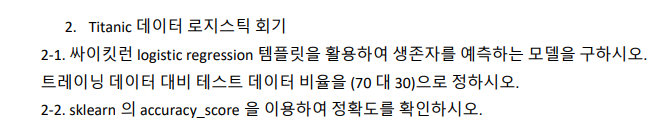

In [25]:
df = pd.read_csv('/Users/SMcity/Desktop/python data folder/titanic_processed.csv')
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
y = df['Survived']
X= df.drop('Survived',axis=1)

In [28]:
# X와 y의 트레이닝 데이터와 테스트 데이터 분류하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 로지스틱 회귀 클래스 인스턴스 생성 ( 객체를 만들기 )
lr_clf = LogisticRegression()

# 로지스틱 모델 만들기, 학습 데이터를 주입
# 학습하려는 데이터를 토대로 피팅이 됨. X = features, y = values.
lr_clf.fit(X_train , y_train)

# 예측 Prediction.
lr_pred = lr_clf.predict(X_test)

#정확도 확인
accuracy_score(y_test, lr_pred)

C:\Python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8097014925373134

# 내 풀이

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [39]:
df = pd.read_csv('/Users/SMcity/Desktop/python data folder/titanic_processed.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [41]:
train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Survived'])
train_X=train[train.columns[1:]]
train_y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_y=test[test.columns[:1]]
X=df[df.columns[1:]]
y=df['Survived']

In [42]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_y))

The accuracy of the Logistic Regression is 0.8171641791044776


C:\Python\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3번
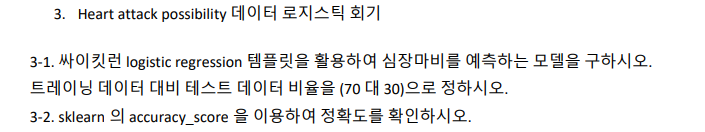

In [44]:
df = pd.read_csv('/Users/SMcity/Desktop/python data folder/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
# X와 y의 트레이닝 데이터와 테스트 데이터 분류하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 로지스틱 회귀 클래스 인스턴스 생성 ( 객체를 만들기 )
lr_clf = LogisticRegression()

# 로지스틱 모델 만들기, 학습 데이터를 주입
# 학습하려는 데이터를 토대로 피팅이 됨. X = features, y = values.
lr_clf.fit(X_train , y_train)

# 예측 Prediction.
lr_pred = lr_clf.predict(X_test)

#정확도 확인
accuracy_score(y_test, lr_pred)

C:\Python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8351648351648352